# Airbnb Listings Analysis

## Objective 1: Data Prep & QA
- Read in Airbnb Listings data
- Cast date columns as datetime format
- Filter down data to only listings in Paris
- QA the Paris listings data: check for missing values, & calculate minimum, maximum and average for each numeric field

In [2]:
import pandas as pd

# Load Airbnb listings dataset
listings = pd.read_csv('Listings.csv', encoding='ISO-8859-1', low_memory=False)

In [3]:
# Display basic information about the dataset
listings.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [10]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   listing_id                   279712 non-null  int64  
 1   name                         279537 non-null  object 
 2   host_id                      279712 non-null  int64  
 3   host_since                   279547 non-null  object 
 4   host_location                278872 non-null  object 
 5   host_response_time           150930 non-null  object 
 6   host_response_rate           150930 non-null  float64
 7   host_acceptance_rate         166625 non-null  float64
 8   host_is_superhost            279547 non-null  object 
 9   host_total_listings_count    279547 non-null  float64
 10  host_has_profile_pic         279547 non-null  object 
 11  host_identity_verified       279547 non-null  object 
 12  neighbourhood                279712 non-null  object 
 13 

In [6]:
# Convert 'host_since' column to datetime format for proper date handling
listings['host_since'] = pd.to_datetime(listings['host_since'])

In [8]:
# Filter listings to only include Paris
paris_listings = (
    listings.query("city == 'Paris'")
    .loc[:, ['host_since', 'neighbourhood', 'city', 'accommodates', 'price']]
)

# Display Paris listings summary
paris_listings.head()

,host_since,neighbourhood,city,accommodates,price
0,2011-12-03,Buttes-Montmartre,Paris,2,53
1,2013-11-29,Buttes-Montmartre,Paris,2,120
2,2014-07-31,Elysee,Paris,2,89
3,2013-12-17,Vaugirard,Paris,2,58
4,2014-12-14,Passy,Paris,2,60


In [10]:
paris_listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64690 entries, 0 to 279711
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   host_since     64657 non-null  datetime64[ns]
 1   neighbourhood  64690 non-null  object        
 2   city           64690 non-null  object        
 3   accommodates   64690 non-null  int64         
 4   price          64690 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.0+ MB


In [12]:
# Check for missing values in Paris listings
paris_listings.isna().sum()

host_since       33
neighbourhood     0
city              0
accommodates      0
price             0
dtype: int64

In [14]:
# Drop rows with missing values
paris_listings = paris_listings.dropna()
paris_listings.isna().sum()

host_since       0
neighbourhood    0
city             0
accommodates     0
price            0
dtype: int64

In [16]:
# Get summary statistics for numerical columns
paris_listings.describe()

,host_since,accommodates,price
count,64657,64657.000000,64657.000000
mean,2015-11-01 11:06:05.528867328,3.037877,113.104614
min,2008-08-30 00:00:00,0.000000,0.000000
25%,2014-03-09 00:00:00,2.000000,59.000000
50%,2015-07-07 00:00:00,2.000000,80.000000
75%,2017-05-29 00:00:00,4.000000,120.000000
max,2021-02-07 00:00:00,16.000000,12000.000000
std,NaN,1.588382,214.479626


In [18]:
# Check for listings with 0 accommodations
paris_listings.query("accommodates == 0").count()

host_since       54
neighbourhood    54
city             54
accommodates     54
price            54
dtype: int64

In [20]:
paris_listings.query("accommodates == 0").head()

,host_since,neighbourhood,city,accommodates,price
98209,2020-07-20,Pantheon,Paris,0,0
203257,2020-02-04,Batignolles-Monceau,Paris,0,0
203258,2016-10-17,Opera,Paris,0,0
203259,2020-04-24,Luxembourg,Paris,0,0
203260,2020-04-24,Vaugirard,Paris,0,0


In [22]:
# Check for listings with 0 price
paris_listings.query("price == 0").count()

host_since       62
neighbourhood    62
city             62
accommodates     62
price            62
dtype: int64

In [24]:
# Check for listings where both price and accommodates are 0
paris_listings.query("accommodates == 0 and price == 0").count()

host_since       54
neighbourhood    54
city             54
accommodates     54
price            54
dtype: int64

In [26]:
# Remove listings where both price and accommodates are 0
paris_listings = paris_listings.drop(paris_listings[(paris_listings['accommodates'] == 0) & (paris_listings['price'] == 0)].index)
paris_listings.query("accommodates == 0 and price == 0").count()

host_since       0
neighbourhood    0
city             0
accommodates     0
price            0
dtype: int64

## Objective 2: Prepare for Visualization
- Create dataframe "paris_listings_neighbourhood" where we group Paris listings by neighbourhood and calculate average price for each. Sort by price in   ascending order.
- Create dataframe "paris_listings_accommodations" where we filter data down to the most expensive neighbourhood in Paris. Group it by accommodates and   calculate average price for each. Sort by price in ascending order.
- Create dataframe "paris_listings_over_time" where we group data by year of host_since. Calculate number of new hosts for each year and average price    of listings for each year.

In [28]:
# Group listings by neighbourhood and calculate the average price
paris_listings_neighbourhood = (
    paris_listings.groupby('neighbourhood')
    .agg({'price':'mean'})
    .sort_values('price')
)

paris_listings_neighbourhood.tail()

,price
neighbourhood,
Luxembourg,155.716575
Palais-Bourbon,157.425170
Passy,161.290875
Louvre,175.629445
Elysee,211.253689


In [30]:
# Analyze pricing by accommodates for the most expensive neighbourhood
paris_listings_accommodations = (
    paris_listings.query("neighbourhood == 'Elysee'")
    .groupby('accommodates')
    .agg({'price':'mean'})
    .sort_values('price')
)

paris_listings_accommodations

,price
accommodates,
1,79.522222
3,152.828767
2,155.103352
4,212.096070
5,328.817073
6,355.508571
8,405.518519
7,411.538462
9,440.272727


In [32]:
# Analyze growth over time by counting new hosts per year and calculating average price
paris_listings_over_time = (
    paris_listings
    .set_index('host_since')
    .resample('YE')
    .agg({'neighbourhood':'count',
          'price':'mean'})
)

paris_listings_over_time.head()

,neighbourhood,price
host_since,,
2008-12-31,4,77.750000
2009-12-31,106,159.641509
2010-12-31,416,125.031250
2011-12-31,1339,124.828230
2012-12-31,4592,111.578615


## Objective 3: Visualize the Data
- Create a horizontal bar chart of the average price by neighbourhood in Paris
- Create a horizontal bar chart of the average price by accommodates in Paris' most expensive neighbourhood.
- Create two line charts: one for the count of new hosts over time, and one for average price.
- Based on our findings, what insights can we conclude about the impact of the 2015 regulations on new hosts and prices?
- Create a dual axis line chart that contains both new hosts and average price over time.

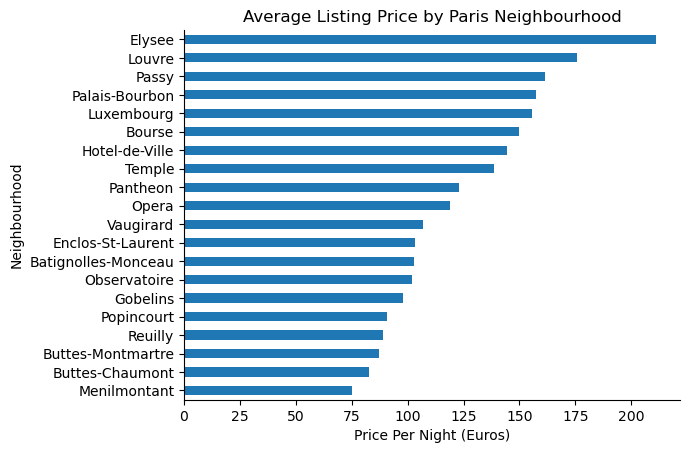

In [34]:
import seaborn as sns

# Plot average price by neighbourhood in Paris
paris_listings_neighbourhood.plot.barh(
    title='Average Listing Price by Paris Neighbourhood',
    xlabel='Price Per Night (Euros)',
    ylabel='Neighbourhood',
    legend=None
)
sns.despine()

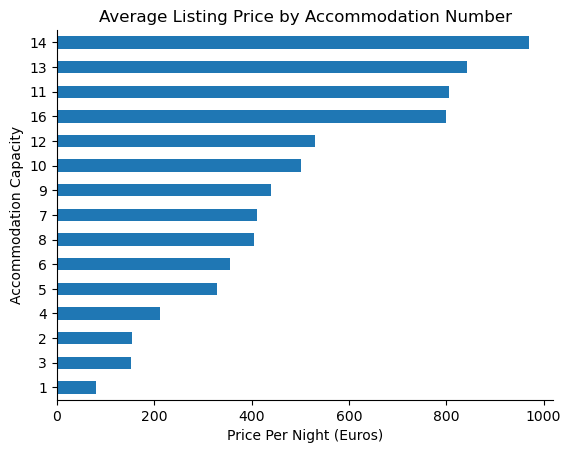

In [35]:
# Plot average price by accommodation number in Paris' most expensive neighbourhood
paris_listings_accommodations.plot.barh(
    title='Average Listing Price by Accommodation Number',
    xlabel='Price Per Night (Euros)',
    ylabel='Accommodation Capacity',
    legend=None
)
sns.despine()

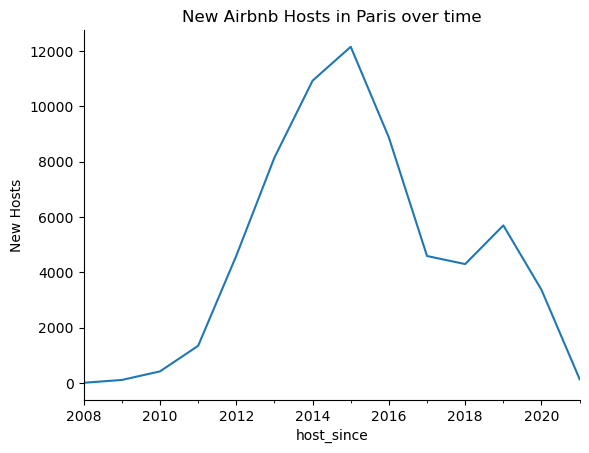

In [38]:
# Plot new Airbnb hosts over time
paris_listings_over_time['neighbourhood'].plot(
    ylabel='New Hosts',
    title='New Airbnb Hosts in Paris over time'
)
sns.despine()

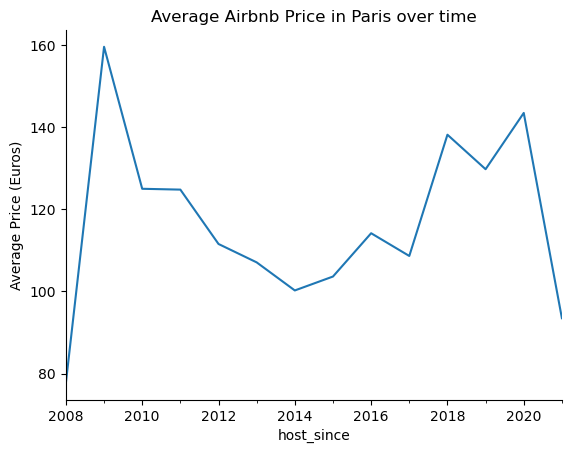

In [40]:
# Plot average Airbnb price over time
paris_listings_over_time['price'].plot(
    ylabel='Average Price (Euros)',
    title='Average Airbnb Price in Paris over time'
)
sns.despine()

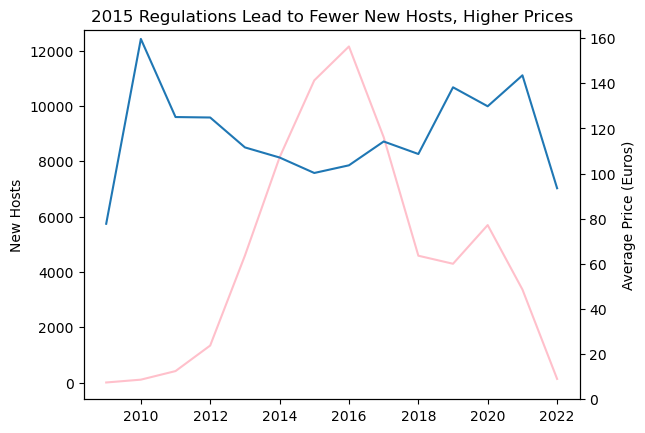

In [42]:
# Dual-axis plot to compare new hosts vs average price over time

import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot(
    paris_listings_over_time.index,
    paris_listings_over_time['neighbourhood'],
    label='New Hosts',
    c='pink'
)
ax.set_ylabel('New Hosts')

ax2 = ax.twinx()

ax2.plot(
    paris_listings_over_time.index,
    paris_listings_over_time['price'],
    label='Average Price (Euros)'
)
ax2.set_ylabel('Average Price (Euros)')
ax2.set_ylim(0)

ax.set_title('2015 Regulations Lead to Fewer New Hosts, Higher Prices')
plt.show()